# Sentiment Analysis using NLP Part 2 using a new dataset

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the Tweets data
df = pd.read_csv('Tweets.csv')

In [3]:
# Find the shape
df.shape

(14640, 15)

In [4]:
# Quick look at the data
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
df.describe()
print(df.columns)

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')


In [6]:
l1 = df['airline'].unique()
l1

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

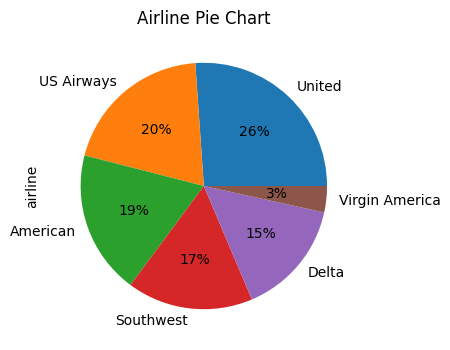

In [7]:
# Create a pie chart by airline %
df['airline'].value_counts().plot.pie(autopct='%.f%%' , figsize=(4,4))
plt.title('Airline Pie Chart')
plt.show()

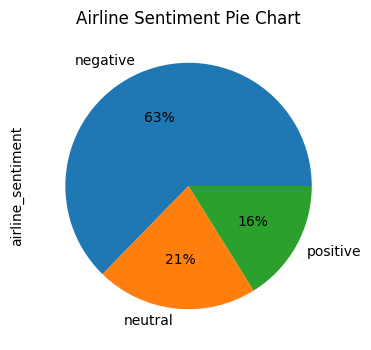

In [8]:
df['airline_sentiment'].value_counts().plot.pie(autopct='%.f%%' , figsize=(4,4))
plt.title('Airline Sentiment Pie Chart')
plt.show()

<AxesSubplot: xlabel='airline'>

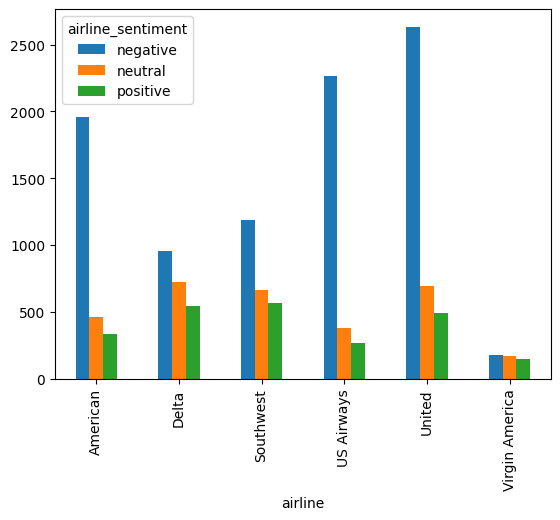

In [9]:
# Create a bar chart by airline and airline sentiment
df.groupby(['airline'])['airline_sentiment'].value_counts().unstack().plot(kind='bar')

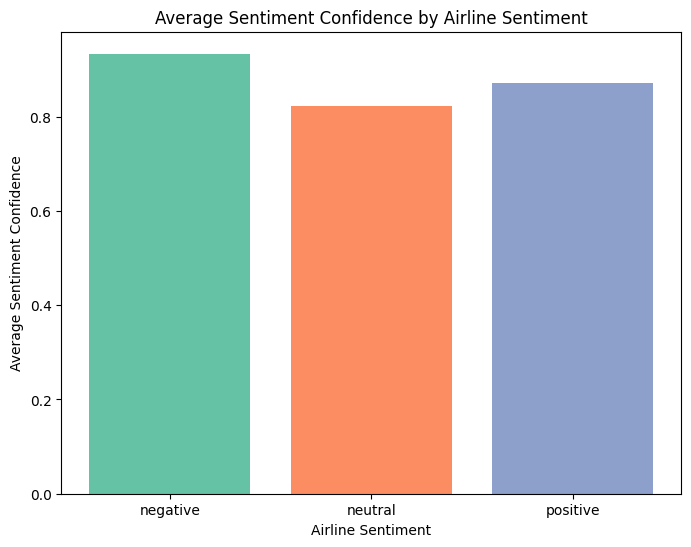

In [55]:
# Show a bar chart of airline_sentiment by airline_sentiment_confidence

# Group the data by airline_sentiment and calculate the mean sentiment_confidence
grouped_data = df.groupby('airline_sentiment')['airline_sentiment_confidence'].mean()

# Create a bar chart
fig, ax = plt.subplots(figsize=(8,6))
color_palette = sns.color_palette("Set2")
ax.bar(grouped_data.index, grouped_data.values, color = color_palette)


# Add labels and titles
ax.set_xlabel('Airline Sentiment')
ax.set_ylabel('Average Sentiment Confidence')
ax.set_title('Average Sentiment Confidence by Airline Sentiment')

# Show the plot
plt.show()

In [11]:
#Create a new dataframe that will only have 2 relevant columns (Identify the 2 columns)
df_1 = df[['text', 'airline_sentiment']]

# Remove the neutral sentiments from the dataframe
df_1=df_1[df_1.airline_sentiment != 'neutral'].reset_index(drop=True)
df_1

,text,airline_sentiment
0,@VirginAmerica plus you've added commercials t...,positive
1,@VirginAmerica it's really aggressive to blast...,negative
2,@VirginAmerica and it's a really big bad thing...,negative
3,@VirginAmerica seriously would pay $30 a fligh...,negative
4,"@VirginAmerica yes, nearly every time I fly VX...",positive
...,...,...
11536,@AmericanAir my flight was Cancelled Flightled...,negative
11537,@AmericanAir right on cue with the delays👌,negative
11538,@AmericanAir thank you we got on a different f...,positive
11539,@AmericanAir leaving over 20 minutes Late Flig...,negative


## Questions
### 1. Use this to create the corpus. Use the same steps from the last lab
### 2. Create bag of words model 
### 3. Apply Various Machine Learning Classification Models (all 5)
### 4. Create Confusion matrix and all the four performance metrics
### 5. Create a TF-IDF model
### 6. Apply the Machine learning models onto this TF-IDF model (all 5)
### 7. Create Confusion matrix and all the four performance metrics
### 8. Compare the various models on both the approaches.
### 9. Which model predicts the best?


In [12]:
# Clean the text by removing any extra characters

import re # tools for cleaning text
import nltk # library to perform NLP

nltk.download('stopwords') # tool to remove the non-essential words. It is a list of words
from nltk.corpus import stopwords

# Stemming means taking the root of the word such as love from loved or loving
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\15199\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
corpus = [] # Build a new list for all the words from all the reviews
for i in range (0, 11541):
    review = re.sub('[^a-zA-Z]', ' ', df_1['text'][i] )
    review = review.lower()
    review = review.split()
    ps =PorterStemmer()
    review = [ps.stem(word) for word in review if not  word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [14]:
corpus

['virginamerica plu ad commerci experi tacki',
 'virginamerica realli aggress blast obnoxi entertain guest face amp littl recours',
 'virginamerica realli big bad thing',
 'virginamerica serious would pay flight seat play realli bad thing fli va',
 'virginamerica ye nearli everi time fli vx ear worm go away',
 'virginamerica well',
 'virginamerica amaz arriv hour earli good',
 'virginamerica lt pretti graphic much better minim iconographi',
 'virginamerica great deal alreadi think nd trip australia amp even gone st trip yet p',
 'virginamerica virginmedia fli fabul seduct sky u take stress away travel http co ahlxhhkiyn',
 'virginamerica thank',
 'virginamerica sfo pdx schedul still mia',
 'virginamerica excit first cross countri flight lax mco heard noth great thing virgin america daystogo',
 'virginamerica flew nyc sfo last week fulli sit seat due two larg gentleman either side help',
 'fli virginamerica',
 'virginamerica know would amazingli awesom bo fll pleas want fli',
 'virginam

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features= 1500)

In [16]:
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
print(cv.get_feature_names_out())

['aa' 'abc' 'abl' ... 'yr' 'yyz' 'zero']


In [18]:
X.shape

(11541, 1500)

In [19]:
from sklearn.preprocessing import LabelEncoder
l= LabelEncoder()
df_1["airline_sentiment"] = l.fit_transform(df_1['airline_sentiment'])

In [20]:
df_1.head()

,text,airline_sentiment
0,@VirginAmerica plus you've added commercials t...,1
1,@VirginAmerica it's really aggressive to blast...,0
2,@VirginAmerica and it's a really big bad thing...,0
3,@VirginAmerica seriously would pay $30 a fligh...,0
4,"@VirginAmerica yes, nearly every time I fly VX...",1


In [21]:
y = df_1.iloc[:, 1].values
y

array([1, 0, 0, ..., 1, 0, 0])

In [22]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,confusion_matrix

In [23]:
def c(ytest,y_pred):
    matrix = confusion_matrix(ytest, y_pred)
    sns.heatmap(matrix, annot = True, fmt = 'g')
    plt.title("Confusion Matrix", fontsize = 40)

#### Naive bayis

In [24]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB()

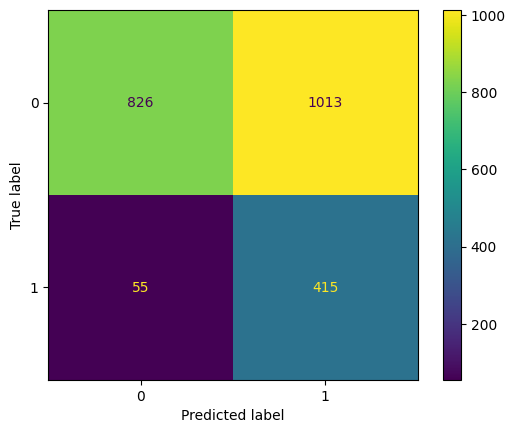

In [25]:
# Predicting the Test set results 
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
cm = confusion_matrix(y_test, y_pred)

# Import Required Libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Display the Confusion MAtrix
disp = ConfusionMatrixDisplay(cm, display_labels = classifier.classes_)
disp.plot()

In [26]:
# Evaluating the results
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("f1_score:", f1_score(y_test, y_pred))
print("Recall_score:", recall_score(y_test, y_pred))
print("Precision_score:", precision_score(y_test, y_pred))

Accuracy Score: 0.5374621048072759
f1_score: 0.4373024236037935
Recall_score: 0.8829787234042553
Precision_score: 0.29061624649859946


### KNN Model

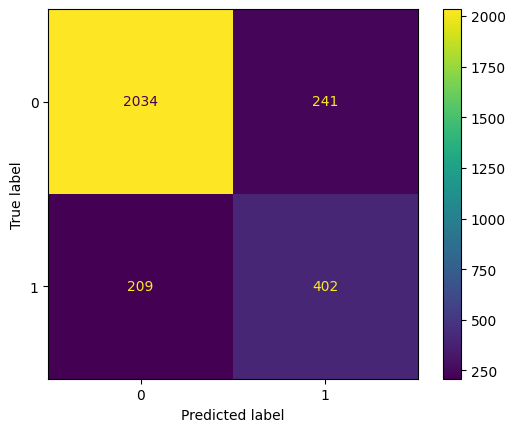

In [27]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display the Confusion MAtrix
disp = ConfusionMatrixDisplay(cm, display_labels = classifier.classes_)
disp.plot()

In [28]:
cm
accuracy_score(y_test, y_pred)
f1_score(y_test, y_pred)
recall_score(y_test, y_pred) # tp / (tp + fn)
precision_score(y_test, y_pred) # tp / (tp + fp)

0.6251944012441679

### Support Vector Machine SVM Model

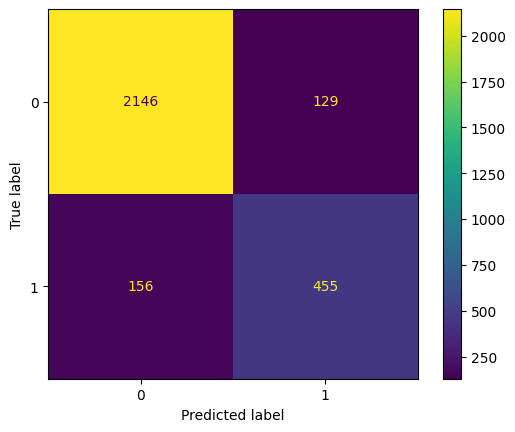

In [29]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display the Confusion MAtrix
disp = ConfusionMatrixDisplay(cm, display_labels = classifier.classes_)
disp.plot()

In [30]:
# Evaluating the results
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("f1_score:", f1_score(y_test, y_pred))
print("Recall_score:", recall_score(y_test, y_pred))
print("Precision_score:", precision_score(y_test, y_pred))

Accuracy Score: 0.9012474012474012
f1_score: 0.7615062761506275
Recall_score: 0.7446808510638298
Precision_score: 0.7791095890410958


### Decision Tree Classification Model

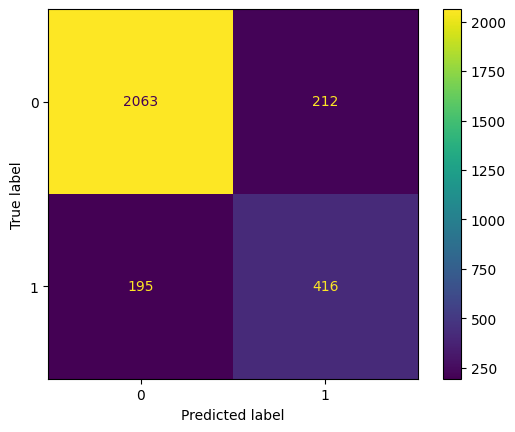

In [31]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Display the Confusion MAtrix
disp = ConfusionMatrixDisplay(cm, display_labels = classifier.classes_)
disp.plot()

In [32]:
# Evaluating the results
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("f1_score:", f1_score(y_test, y_pred))
print("Recall_score:", recall_score(y_test, y_pred))
print("Precision_score:", precision_score(y_test, y_pred))

Accuracy Score: 0.8589743589743589
f1_score: 0.6715092816787731
Recall_score: 0.6808510638297872
Precision_score: 0.6624203821656051


### Random Forest Model

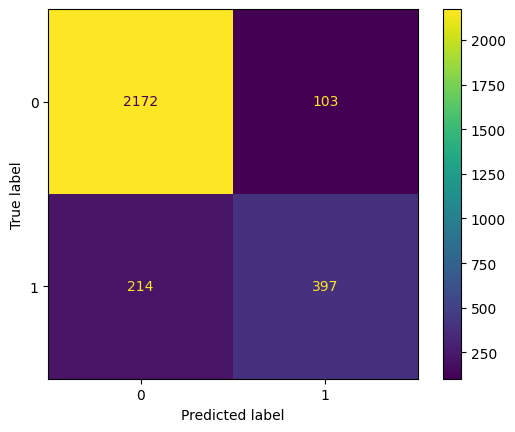

In [33]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)



# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Display the Confusion MAtrix
disp = ConfusionMatrixDisplay(cm, display_labels = classifier.classes_)
disp.plot()

In [34]:
# Evaluating the results
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("f1_score:", f1_score(y_test, y_pred))
print("Recall_score:", recall_score(y_test, y_pred))
print("Precision_score:", precision_score(y_test, y_pred))

Accuracy Score: 0.8901593901593902
f1_score: 0.7146714671467148
Recall_score: 0.6497545008183306
Precision_score: 0.794


## Feature Extraction
### TF IDF 

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))


In [36]:
corpus = vectorizer.fit_transform(corpus).toarray()

In [37]:
X =corpus

In [38]:
X.shape

(11541, 1589)

### Random Forest 

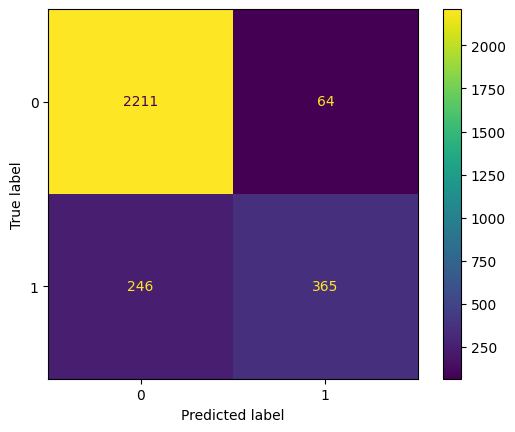

In [39]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)



# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Display the Confusion MAtrix
disp = ConfusionMatrixDisplay(cm, display_labels = classifier.classes_)
disp.plot()

In [40]:
# Evaluating the results
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("f1_score:", f1_score(y_test, y_pred))
print("Recall_score:", recall_score(y_test, y_pred))
print("Precision_score:", precision_score(y_test, y_pred))

Accuracy Score: 0.8925848925848926
f1_score: 0.7019230769230769
Recall_score: 0.5973813420621932
Precision_score: 0.8508158508158508


### Decision Tree 

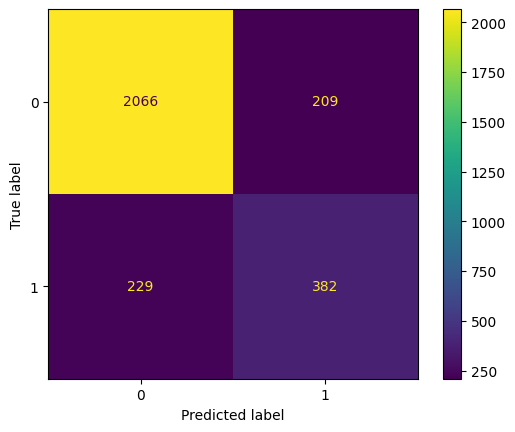

In [41]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Display the Confusion MAtrix
disp = ConfusionMatrixDisplay(cm, display_labels = classifier.classes_)
disp.plot()

In [42]:
# Evaluating the results
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("f1_score:", f1_score(y_test, y_pred))
print("Recall_score:", recall_score(y_test, y_pred))
print("Precision_score:", precision_score(y_test, y_pred))

Accuracy Score: 0.8482328482328483
f1_score: 0.6356073211314477
Recall_score: 0.6252045826513911
Precision_score: 0.6463620981387479


### Support Vector Machine SVM Model

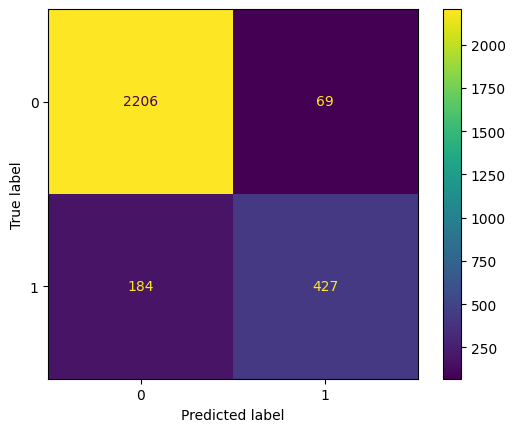

In [43]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display the Confusion MAtrix
disp = ConfusionMatrixDisplay(cm, display_labels = classifier.classes_)
disp.plot()

In [44]:
# Evaluating the results
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("f1_score:", f1_score(y_test, y_pred))
print("Recall_score:", recall_score(y_test, y_pred))
print("Precision_score:", precision_score(y_test, y_pred))

Accuracy Score: 0.9123354123354124
f1_score: 0.7714543812104787
Recall_score: 0.6988543371522095
Precision_score: 0.8608870967741935


### KNN Model

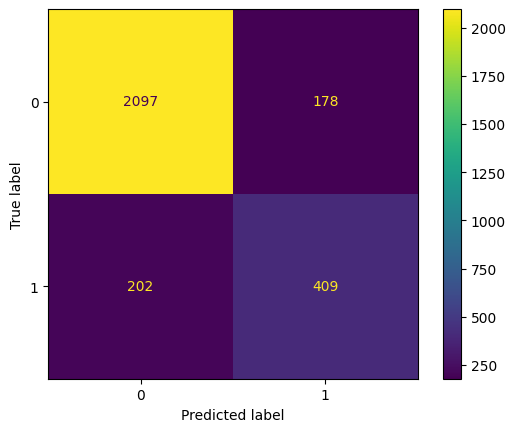

In [45]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display the Confusion MAtrix
disp = ConfusionMatrixDisplay(cm, display_labels = classifier.classes_)
disp.plot()

In [46]:
# Evaluating the results
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("f1_score:", f1_score(y_test, y_pred))
print("Recall_score:", recall_score(y_test, y_pred))
print("Precision_score:", precision_score(y_test, y_pred))

Accuracy Score: 0.8683298683298684
f1_score: 0.6828046744574291
Recall_score: 0.6693944353518821
Precision_score: 0.696763202725724


### Naive Bayes Algorithm

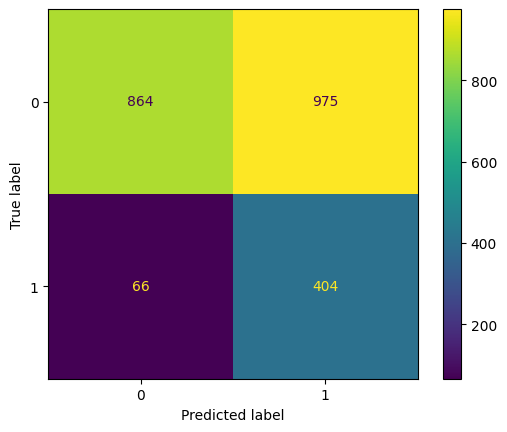

In [47]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)



# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
cm = confusion_matrix(y_test, y_pred)

# Display the Confusion MAtrix
disp = ConfusionMatrixDisplay(cm, display_labels = classifier.classes_)
disp.plot()

In [48]:
# Evaluating the results
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("f1_score:", f1_score(y_test, y_pred))
print("Recall_score:", recall_score(y_test, y_pred))
print("Precision_score:", precision_score(y_test, y_pred))

Accuracy Score: 0.5491554785621481
f1_score: 0.4369929691725256
Recall_score: 0.8595744680851064
Precision_score: 0.29296591733139954


## SVM model fit the best since it has the maximum Precision Score and Accuracy Score:
1. Precision Score : 0.86
2. Accuracy Score  : 0.91